In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import numpy as np

train_samples = 10000

X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

def expand(i):
    res = [0 for _ in range(0, 10)]
    res[i] = 1 
    return res

y = [expand(int(v)) for v in y]
X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=0.8, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [2]:
import sys
import os

sys.path.append(os.path.abspath(".."))

import src.FFNN as ffnn
from src.utils import plot_training_results
from src.Regularization import LNormRegularization

In [3]:
# Define neural network parameters
layer_size = [784, 128, 128, 10]
activations = ["sigmoid", "sigmoid", "tanh"]

## Training

In [4]:
model = ffnn.FFNN(layer_sizes=layer_size, activations=activations, loss="mse", weight_initializer="uniform", weight_init_args={"seed": 73})
plot = model.fit(X_train, y_train, 300, 0.1, 50, True, X_val, y_val)

Epoch 1/300, Loss: 1.5422, Val_loss: 1.3404
Epoch 2/300, Loss: 1.2992, Val_loss: 1.2614
Epoch 3/300, Loss: 1.2334, Val_loss: 1.2102
Epoch 4/300, Loss: 1.1901, Val_loss: 1.1801
Epoch 5/300, Loss: 1.1637, Val_loss: 1.1491
Epoch 6/300, Loss: 1.1418, Val_loss: 1.1361
Epoch 7/300, Loss: 0.9973, Val_loss: 0.3318
Epoch 8/300, Loss: 0.2887, Val_loss: 0.2748
Epoch 9/300, Loss: 0.2597, Val_loss: 0.2592
Epoch 10/300, Loss: 0.2397, Val_loss: 0.2414
Epoch 11/300, Loss: 0.2311, Val_loss: 0.2290
Epoch 12/300, Loss: 0.2245, Val_loss: 0.2310
Epoch 13/300, Loss: 0.2169, Val_loss: 0.2136
Epoch 14/300, Loss: 0.2027, Val_loss: 0.2009
Epoch 15/300, Loss: 0.1969, Val_loss: 0.2025
Epoch 16/300, Loss: 0.1926, Val_loss: 0.2021
Epoch 17/300, Loss: 0.1870, Val_loss: 0.1885
Epoch 18/300, Loss: 0.1798, Val_loss: 0.1811
Epoch 19/300, Loss: 0.1799, Val_loss: 0.1879
Epoch 20/300, Loss: 0.1711, Val_loss: 0.1775
Epoch 21/300, Loss: 0.1699, Val_loss: 0.1769
Epoch 22/300, Loss: 0.1676, Val_loss: 0.1796
Epoch 23/300, Loss:

In [22]:
model_L1 = ffnn.FFNN(layer_sizes=layer_size, activations=activations, loss="mse", weight_initializer="uniform", weight_init_args={"seed": 73}, 
                  alpha_regularizer=0.01, 
                  regularizer=LNormRegularization(p = 1))
plot_L1 = model_L1.fit(X_train, y_train, 300, 0.1, 50, True, X_val, y_val)

Epoch 1/300, Loss: 1.0655, Val_loss: 0.9771
Epoch 2/300, Loss: 0.9784, Val_loss: 0.9795
Epoch 3/300, Loss: 0.9784, Val_loss: 0.9785
Epoch 4/300, Loss: 0.9784, Val_loss: 0.9777
Epoch 5/300, Loss: 0.9784, Val_loss: 0.9774
Epoch 6/300, Loss: 0.9784, Val_loss: 0.9774
Epoch 7/300, Loss: 0.9783, Val_loss: 0.9773
Epoch 8/300, Loss: 0.9783, Val_loss: 0.9778
Epoch 9/300, Loss: 0.9784, Val_loss: 0.9795
Epoch 10/300, Loss: 0.9784, Val_loss: 0.9784
Epoch 11/300, Loss: 0.9783, Val_loss: 0.9761
Epoch 12/300, Loss: 0.9783, Val_loss: 0.9775
Epoch 13/300, Loss: 0.9784, Val_loss: 0.9770
Epoch 14/300, Loss: 0.9784, Val_loss: 0.9792
Epoch 15/300, Loss: 0.9785, Val_loss: 0.9785
Epoch 16/300, Loss: 0.9784, Val_loss: 0.9823
Epoch 17/300, Loss: 0.9783, Val_loss: 0.9798
Epoch 18/300, Loss: 0.9784, Val_loss: 0.9793
Epoch 19/300, Loss: 0.9784, Val_loss: 0.9796
Epoch 20/300, Loss: 0.9784, Val_loss: 0.9784
Epoch 21/300, Loss: 0.9784, Val_loss: 0.9759
Epoch 22/300, Loss: 0.9782, Val_loss: 0.9776
Epoch 23/300, Loss:

In [16]:
model_L2 = ffnn.FFNN(layer_sizes=layer_size, activations=activations, loss="mse", weight_initializer="uniform", weight_init_args={"seed": 73},
                 alpha_regularizer=0.01, 
                 regularizer=LNormRegularization(p = 2))
plot_L2 = model_L2.fit(X_train, y_train, 300, 0.1, 50, True, X_val, y_val)

Epoch 1/300, Loss: 1.4460, Val_loss: 0.5695
Epoch 2/300, Loss: 0.4845, Val_loss: 0.4332
Epoch 3/300, Loss: 0.3964, Val_loss: 0.3673
Epoch 4/300, Loss: 0.3438, Val_loss: 0.3351
Epoch 5/300, Loss: 0.3108, Val_loss: 0.2860
Epoch 6/300, Loss: 0.2758, Val_loss: 0.2696
Epoch 7/300, Loss: 0.2604, Val_loss: 0.2599
Epoch 8/300, Loss: 0.2433, Val_loss: 0.2371
Epoch 9/300, Loss: 0.2275, Val_loss: 0.2275
Epoch 10/300, Loss: 0.2178, Val_loss: 0.2199
Epoch 11/300, Loss: 0.2098, Val_loss: 0.2092
Epoch 12/300, Loss: 0.2059, Val_loss: 0.2128
Epoch 13/300, Loss: 0.1998, Val_loss: 0.2003
Epoch 14/300, Loss: 0.1953, Val_loss: 0.1965
Epoch 15/300, Loss: 0.1944, Val_loss: 0.1974
Epoch 16/300, Loss: 0.1858, Val_loss: 0.1937
Epoch 17/300, Loss: 0.1823, Val_loss: 0.1845
Epoch 18/300, Loss: 0.1723, Val_loss: 0.1851
Epoch 19/300, Loss: 0.1748, Val_loss: 0.1780
Epoch 20/300, Loss: 0.1689, Val_loss: 0.1838
Epoch 21/300, Loss: 0.1689, Val_loss: 0.1740
Epoch 22/300, Loss: 0.1649, Val_loss: 0.1729
Epoch 23/300, Loss:

In [7]:
y_test_labels = np.argmax(y_test, axis=1)

## Classification Report

In [18]:
y_pred = model.predict(X_test)

# Convert one-hot predictions to labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Compute evaluation metrics
accuracy = accuracy_score(y_test_labels, y_pred_labels)
f1 = f1_score(y_test_labels, y_pred_labels, average="weighted")
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-score: {f1:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred_labels))

Accuracy: 0.9530
F1-score: 0.9529

Confusion Matrix:
[[668   0   1   0   1   0   8   1   6   0]
 [  0 802   3   4   0   2   0   1   5   3]
 [  6   3 681   7   6   0   4   2   6   1]
 [  3   1  10 674   0   8   2   7   8   2]
 [  1   0   1   1 633   0   4   2   3  14]
 [  1   3   2  17   0 595  10   1   4   1]
 [  1   3   2   0   3  10 669   0   1   0]
 [  2   8   8   1   2   1   0 676   3   9]
 [  2   6   4  10   1  12   5   7 591   5]
 [  6   3   2   7  12   2   1   9   5 682]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       685
           1       0.97      0.98      0.97       820
           2       0.95      0.95      0.95       716
           3       0.93      0.94      0.94       715
           4       0.96      0.96      0.96       659
           5       0.94      0.94      0.94       634
           6       0.95      0.97      0.96       689
           7       0.96      0.95      0.95       710
     

In [28]:
y_pred = model_L1.predict(X_test)

# Convert one-hot predictions to labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Compute evaluation metrics
accuracy = accuracy_score(y_test_labels, y_pred_labels)
f1 = f1_score(y_test_labels, y_pred_labels, average="weighted")
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-score: {f1:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred_labels))

Accuracy: 0.0984
F1-score: 0.0176

Confusion Matrix:
[[  0   0   0   0   0   0 685   0   0   0]
 [  0   0   0   0   0   0 820   0   0   0]
 [  0   0   0   0   0   0 716   0   0   0]
 [  0   0   0   0   0   0 715   0   0   0]
 [  0   0   0   0   0   0 659   0   0   0]
 [  0   0   0   0   0   0 634   0   0   0]
 [  0   0   0   0   0   0 689   0   0   0]
 [  0   0   0   0   0   0 710   0   0   0]
 [  0   0   0   0   0   0 643   0   0   0]
 [  0   0   0   0   0   0 729   0   0   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       685
           1       0.00      0.00      0.00       820
           2       0.00      0.00      0.00       716
           3       0.00      0.00      0.00       715
           4       0.00      0.00      0.00       659
           5       0.00      0.00      0.00       634
           6       0.10      1.00      0.18       689
           7       0.00      0.00      0.00       710
     

/home/afif/tmp/ML_TUBES_1/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/afif/tmp/ML_TUBES_1/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/afif/tmp/ML_TUBES_1/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [20]:
y_pred = model_L2.predict(X_test)

# Convert one-hot predictions to labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Compute evaluation metrics
accuracy = accuracy_score(y_test_labels, y_pred_labels)
f1 = f1_score(y_test_labels, y_pred_labels, average="weighted")
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-score: {f1:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred_labels))

Accuracy: 0.9379
F1-score: 0.9378

Confusion Matrix:
[[663   0   5   0   2   1   6   1   7   0]
 [  0 799   3   3   1   0   2   3   8   1]
 [  5   8 656   4   8   2  13   4  11   5]
 [  2   2  11 662   1   7   4   9  12   5]
 [  2   2   2   0 628   0   5   2   7  11]
 [  8   3   1  31   4 569   9   1   4   4]
 [  1   3   5   1   4  10 661   0   4   0]
 [  2   8   9   2   1   3   0 674   1  10]
 [  5   4  12  14   3   2   1   1 596   5]
 [  7   5   2  10  21   1   3  11  12 657]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       685
           1       0.96      0.97      0.97       820
           2       0.93      0.92      0.92       716
           3       0.91      0.93      0.92       715
           4       0.93      0.95      0.94       659
           5       0.96      0.90      0.93       634
           6       0.94      0.96      0.95       689
           7       0.95      0.95      0.95       710
     

## Loss training plot

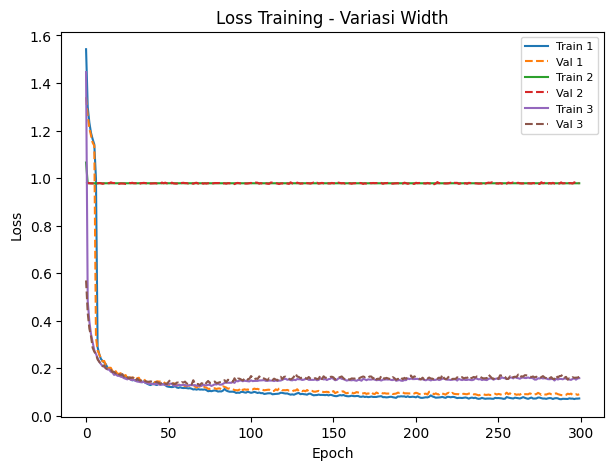

In [29]:
plot_training_results([plot, plot_L1, plot_L2])

## Weight and Weight Gradient Plot

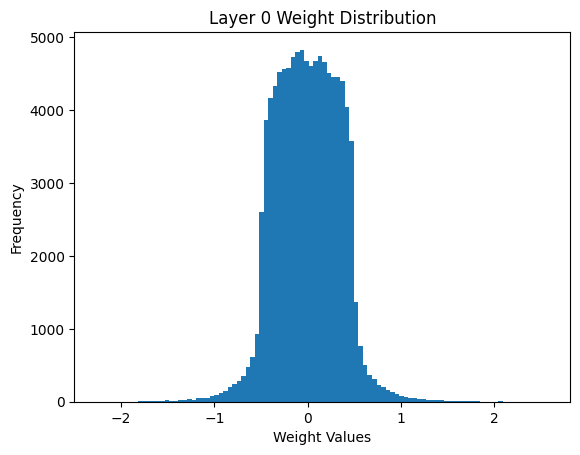

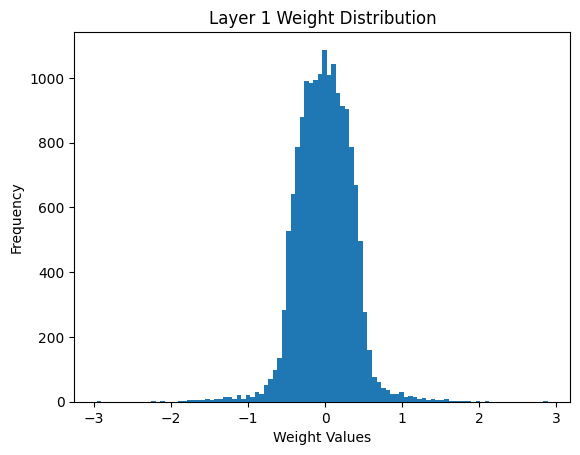

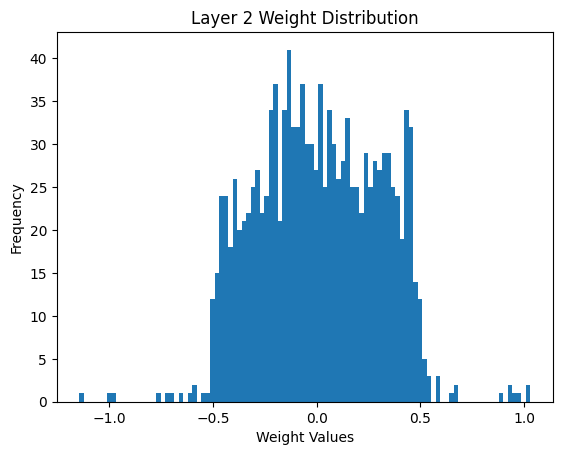

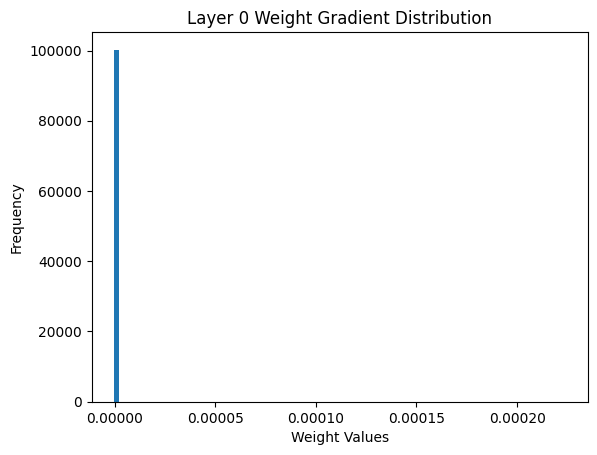

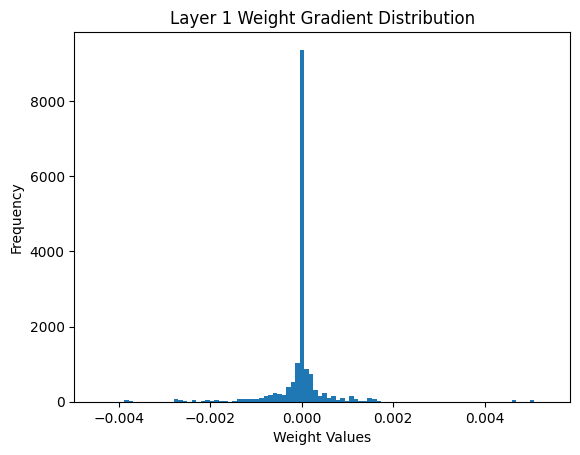

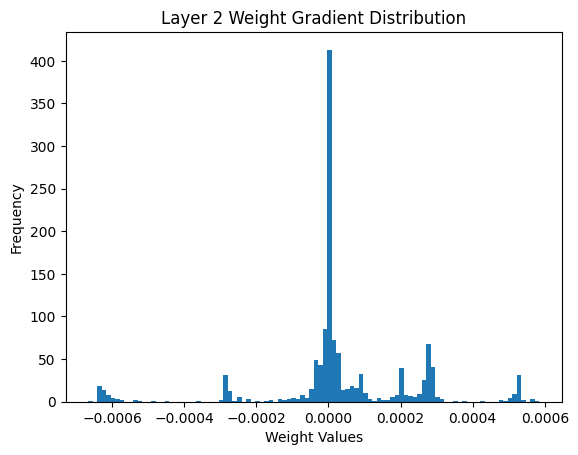

In [25]:
model.plot_weight([0,1,2])
model.plot_gradient_weight([0,1,2])

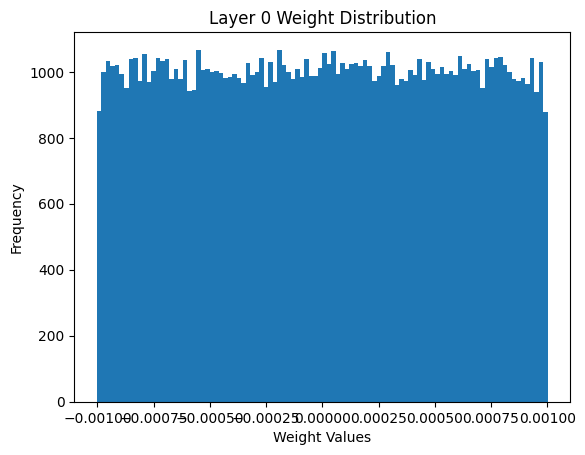

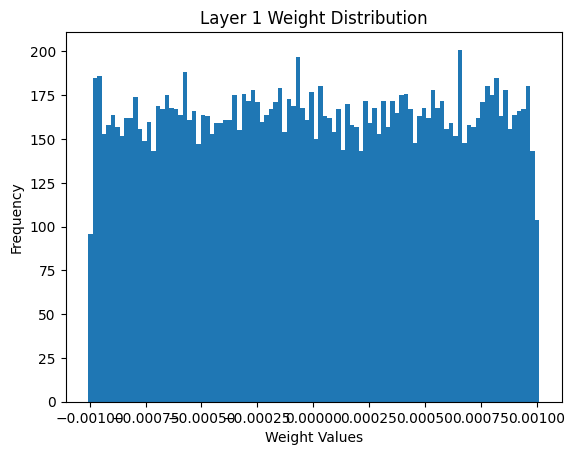

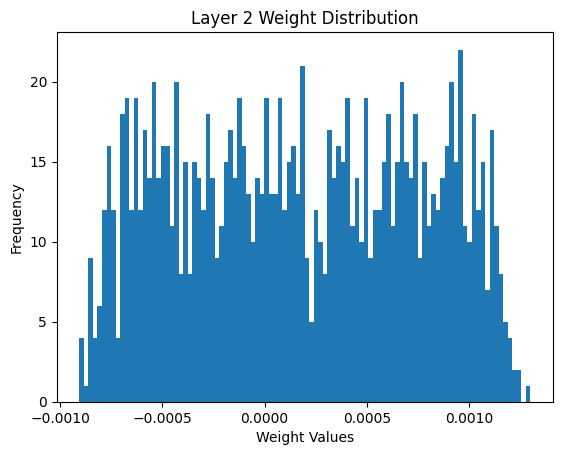

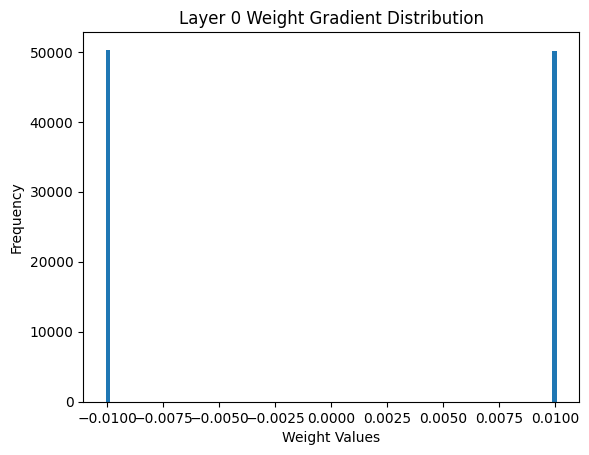

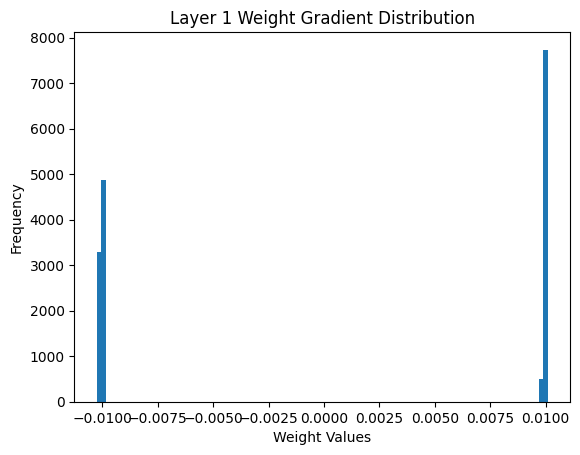

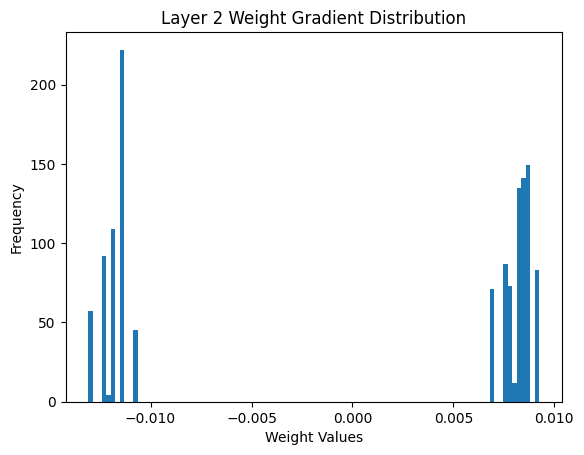

In [26]:
model_L1.plot_weight([0,1,2])
model_L1.plot_gradient_weight([0,1,2])

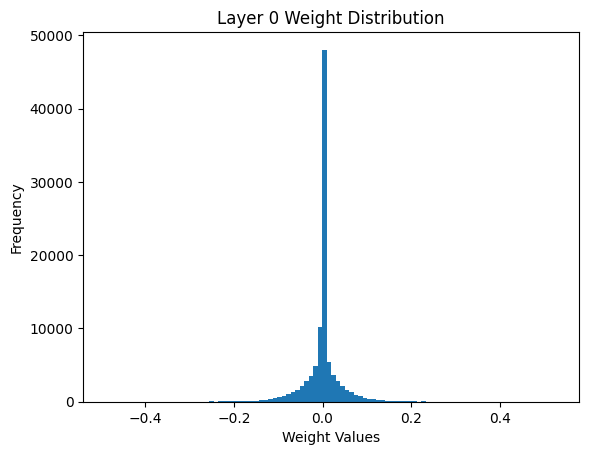

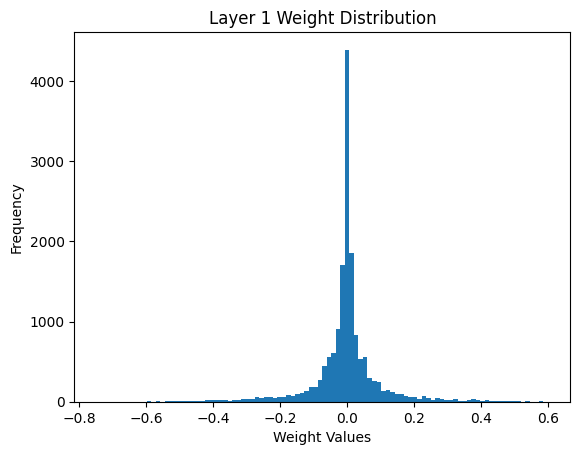

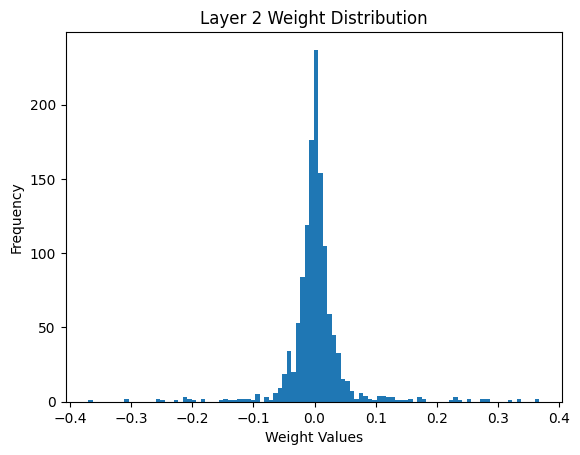

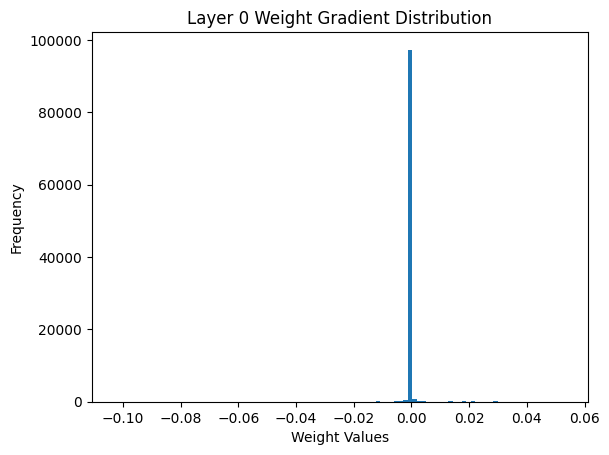

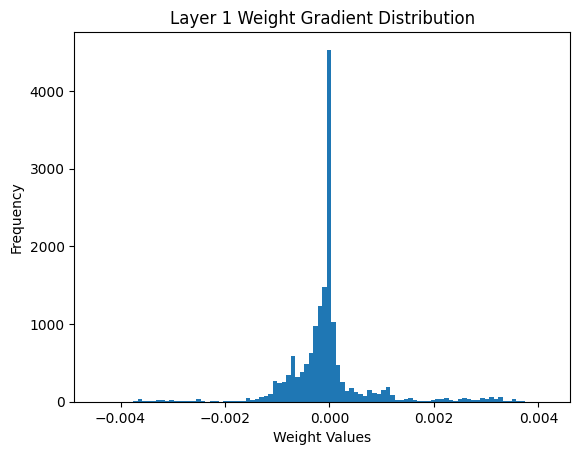

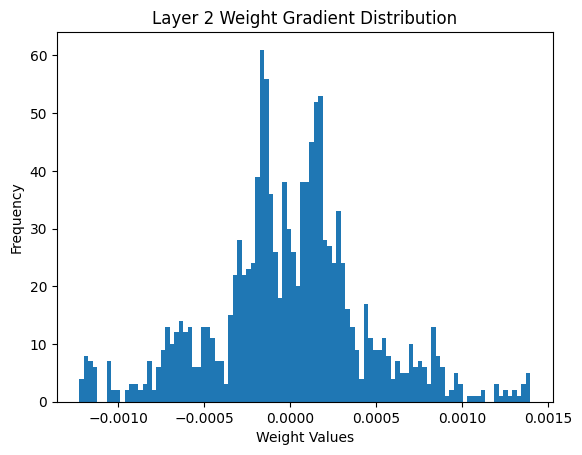

In [27]:
model_L2.plot_weight([0,1,2])
model_L2.plot_gradient_weight([0,1,2])